<a href="https://colab.research.google.com/github/boshuaiYu/CaiCai_DL/blob/main/CaiCai_DL_Week5.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)

n_dots = 20
x = np.linspace(0,1,n_dots)
y = np.sqrt(x) + 0.2*np.random.rand(n_dots) - 0.1

In [2]:
y0 = x ** 2
np.polyfit(x,y0,2)

array([ 1.00000000e+00, -2.00019564e-18, -3.29090297e-17])

In [5]:
p = np.poly1d(np.polyfit(x,y0,2))
print(p)

   2
1 x - 2e-18 x - 3.291e-17


In [12]:
def plot_polynomial_fit(x,y,deg):
  p = np.poly1d(np.polyfit(x,y,deg))
  t = np.linspace(0,1,200)
  plt.plot(x,y,"ro",t,p(t),"-",t,np.sqrt(t),"r--")

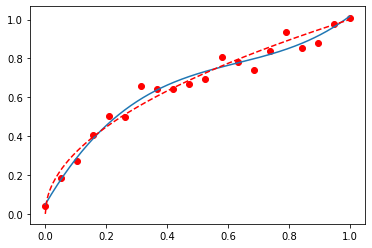

In [13]:
plot_polynomial_fit(x,y,3)

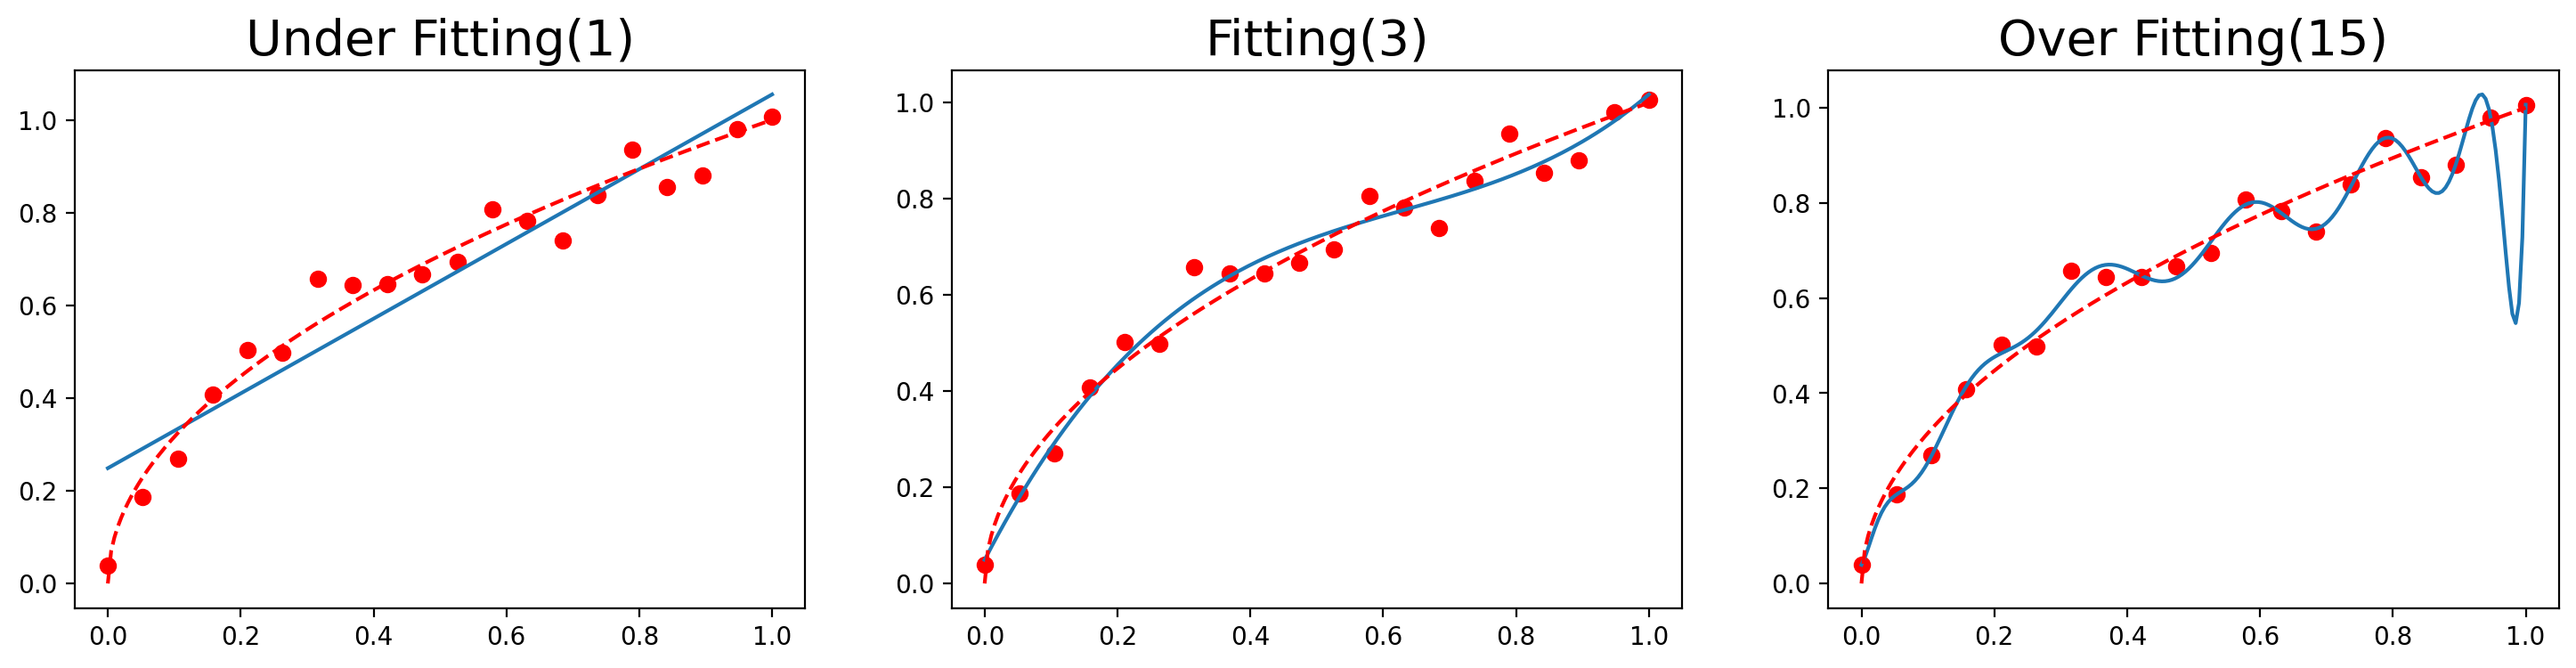

In [31]:
plt.figure(figsize=(18,4),dpi=200)
titles = ["Under Fitting(1)","Fitting(3)","Over Fitting(15)"]
for index, deg in enumerate([1,3,15]):
  plt.subplot(1,3,index+1)
  plot_polynomial_fit(x,y,deg)
  plt.title(titles[index],fontsize=20)

##**模型欠拟合实例**

创建一个数据满足<font color="orange">$y = 2x_1^2 - x_2^2$</font>方程的分布数组

In [33]:
import sys
sys.path.append("/content/drive/MyDrive/Colab Notebooks/week4_function")

In [48]:
from torchLearning import *
import torch
from torch import nn,optim
from torch.utils.data import Dataset,TensorDataset,DataLoader

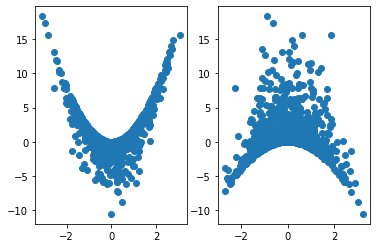

In [37]:
torch.manual_seed(420)

features,labels = tensorGenReg(w=[2,-1],bias=False,deg=2)

plt.subplot(121)
plt.scatter(features[:,0],labels)
plt.subplot(122)
plt.scatter(features[:,1],labels);

In [38]:
train_loader,test_loader = split_loader(features,labels)

In [39]:
class LR_class(nn.Module):
  def __init__(self,in_features=2,out_features=1):
    super(LR_class,self).__init__()
    self.linear = nn.Linear(in_features,out_features)

  def forward(self,x):
    out = self.linear(x)
    return out

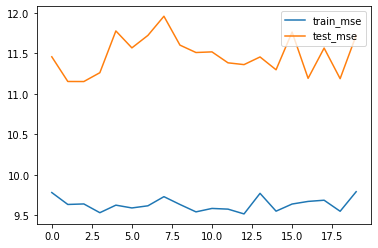

In [45]:
torch.manual_seed(420)

LR = LR_class()
train_l = []
test_l = []

num_epochs = 20

for epochs in range(num_epochs):
  fit(net=LR,
    criterion=nn.MSELoss(),
    optimizer=optim.SGD(LR.parameters(),lr=0.03),
    batchdata=train_loader,
    epochs=epochs)
  train_l.append(mse_cal(train_loader,LR).detach().numpy())
  test_l.append(mse_cal(test_loader,LR).detach().numpy())

plt.plot(list(range(num_epochs)), train_l, label="train_mse")
plt.plot(list(range(num_epochs)), test_l, label="test_mse")
plt.legend(loc=1)

In [54]:
class LR_class1(nn.Module):
  def __init__(self,in_features=2,n_hidden=4,out_features=1):
    super(LR_class1,self).__init__()
    self.linear1 = nn.Linear(in_features,n_hidden)
    self.linear2 = nn.Linear(n_hidden,n_hidden)

  def forward(self,x):
    z1 = self.linear1(x)
    out = self.linear2(z1)
    return out

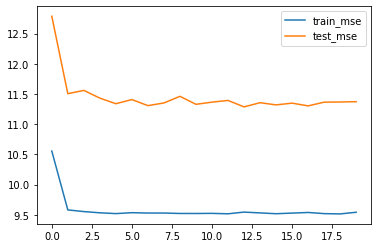

In [56]:
torch.manual_seed(420)

LR1 = LR_class1()

train_l, test_l = model_train_test(
    LR1,
    train_loader,
    test_loader,
    num_epochs=20,
    criterion=nn.MSELoss(),
    optimizer=optim.SGD,
    lr=0.03,
    cla=False,
    eva=mse_cal
)

plt.plot(list(range(num_epochs)),train_l,label="train_mse")
plt.plot(list(range(num_epochs)),test_l,label="test_mse")
plt.legend(loc=1)

##**激活函数性能比较**

In [71]:
class Sigmoid_class1(nn.Module):
  def __init__(self,in_features=2,n_hidden=4,out_features=1,bias=True):
    super(Sigmoid_class1,self).__init__()
    self.linear1 = nn.Linear(in_features,n_hidden,bias=bias)
    self.linear2 = nn.Linear(n_hidden,out_features,bias=bias)

  def forward(self,x):
    z1 = self.linear1(x)
    p1 = torch.sigmoid(z1)
    out = self.linear2(p1)
    return out

class tanh_class1(nn.Module):
  def __init__(self,in_features=2,n_hidden=4,out_features=1,bias=True):
    super(tanh_class1,self).__init__()
    self.linear1 = nn.Linear(in_features,n_hidden,bias=bias)
    self.linear2 = nn.Linear(n_hidden,out_features,bias=bias)

  def forward(self,x):
    z1 = self.linear1(x)
    p1 = torch.tanh(z1)
    out = self.linear2(p1)
    return out

class Relu_class1(nn.Module):
  def __init__(self,in_features=2,n_hidden=4,out_features=1,bias=True):
    super(Relu_class1,self).__init__()
    self.linear1 = nn.Linear(in_features,n_hidden,bias=bias)
    self.linear2 = nn.Linear(n_hidden,out_features,bias=bias)

  def forward(self,x):
    z1 = self.linear1(x)
    p1 = torch.relu(z1)
    out = self.linear2(p1)
    return out

In [72]:
torch.manual_seed(420)

LR1 = LR_class1()
sigmoid_model = Sigmoid_class1()
tanh_model = tanh_class1()
relu_model = Relu_class1()

model_l = [LR1,sigmoid_model,tanh_model,relu_model]
name_l = ["LR1","sigmoid_model","tanh_model","relu_model"]

In [73]:
num_epochs = 30
lr = 0.03

In [74]:
mse_train = torch.zeros(len(model_l),num_epochs)
mse_test = torch.zeros(len(model_l),num_epochs)

In [75]:
for epochs in range(num_epochs):
  for i,model in enumerate(model_l):
    fit(net=model,
      criterion=nn.MSELoss(),
      optimizer=optim.SGD(model.parameters(),lr=lr),
      batchdata=train_loader,
      epochs=epochs
      )
    mse_train[i][epochs] = mse_cal(train_loader,model).detach()
    mse_test[i][epochs] = mse_cal(test_loader,model).detach()

/content/drive/MyDrive/Colab Notebooks/week4_function/torchLearning.py:740: UserWarning: Using a target size (torch.Size([700, 1])) that is different to the input size (torch.Size([700, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(yhat, y)
/content/drive/MyDrive/Colab Notebooks/week4_function/torchLearning.py:740: UserWarning: Using a target size (torch.Size([300, 1])) that is different to the input size (torch.Size([300, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(yhat, y)
/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([10, 1])) that is different to the input size (torch.Size([10, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Text(0.5, 1.0, 'mse_train')

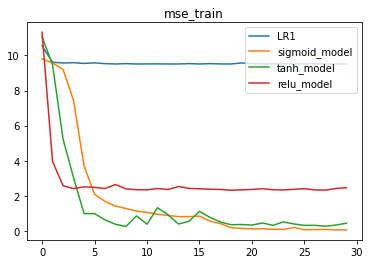

In [76]:
for i,name in enumerate(name_l):
  plt.plot(list(range(num_epochs)),mse_train[i],label=name)
plt.legend(loc=1)
plt.title("mse_train")

Text(0.5, 1.0, 'mse_train')

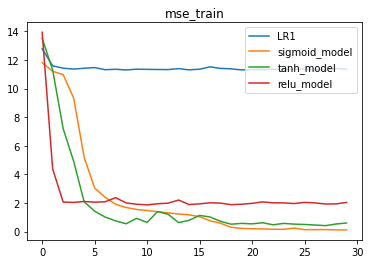

In [77]:
for i,name in enumerate(name_l):
  plt.plot(list(range(num_epochs)),mse_test[i],label=name)
plt.legend(loc=1)
plt.title("mse_train")

##**构建复杂的神经网络**

###**Relu函数叠加**

<img src="https://i.loli.net/2021/02/08/qBxbuJfQlURjG8N.jpg" alt="51" style="zoom:10%;" />

In [79]:
class Relu_class2(nn.Module):
  def __init__(self,in_features=2,n_hidden1=4,n_hidden2=4,out_features=1,bias=True):
    super(Relu_class2,self).__init__()
    self.linear1 = nn.Linear(in_features,n_hidden1,bias=True)
    self.linear2 = nn.Linear(n_hidden1,n_hidden2,bias=True)
    self.linear3 = nn.Linear(n_hidden2,out_features,bias=True)

  def forward(self,x):
    z1 = self.linear1(x)
    p1 = torch.relu(z1)
    z2 = self.linear2(p1)
    p2 = torch.relu(z2)
    out = self.linear3(p2)
    return out

In [85]:
torch.manual_seed(24)

relu_model1 = Relu_class1()
relu_model2 = Relu_class2()

model_l = [relu_model1,relu_model2]
name_l = ["relu_model1","relu_model2"]

num_epochs = 20
lr = 0.03

train_l,test_l = model_comparison(
    model_l=model_l,
    name_l=name_l,
    train_data=train_loader,
    test_data=test_loader,
    num_epochs=num_epochs,
    criterion=nn.MSELoss(),
    optimizer=optim.SGD,
    lr=0.03,
    cla=False,
    eva=mse_cal
)

Text(0.5, 1.0, 'mse_train')

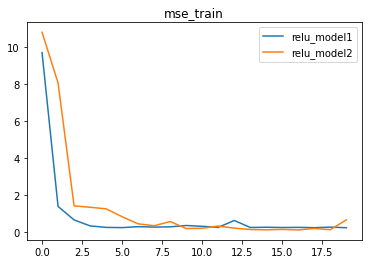

In [86]:
for i,name in enumerate(name_l):
  plt.plot(list(range(num_epochs)),train_l[i],label=name)
plt.legend(loc=1)
plt.title("mse_train")

Text(0.5, 1.0, 'mse_test')

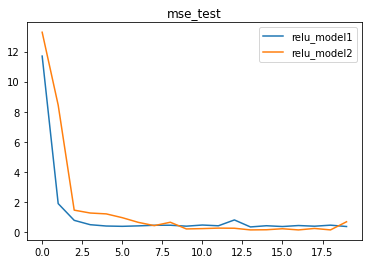

In [87]:
for i,name in enumerate(name_l):
  plt.plot(list(range(num_epochs)),test_l[i],label=name)
plt.legend(loc=1)
plt.title("mse_test")

In [91]:
class Relu_class3(nn.Module):
  def __init__(self,in_features=2,n_hidden1=4,n_hidden2=4,n_hidden3=4,out_features=1,bias=True):
    super(Relu_class3,self).__init__()
    self.linear1 = nn.Linear(in_features,n_hidden1,bias=True)
    self.linear2 = nn.Linear(n_hidden1,n_hidden2,bias=True)
    self.linear3 = nn.Linear(n_hidden2,n_hidden3,bias=True)
    self.linear4 = nn.Linear(n_hidden3,out_features,bias=True)

  def forward(self,x):
    z1 = self.linear1(x)
    p1 = torch.relu(z1)
    z2 = self.linear2(p1)
    p2 = torch.relu(z2)
    z3 = self.linear3(p2)
    p3 = torch.relu(z3)
    out = self.linear4(p3)
    return out

class Relu_class4(nn.Module):
  def __init__(self,in_features=2,n_hidden1=4,n_hidden2=4,n_hidden3=4,n_hidden4=4,out_features=1,bias=True):
    super(Relu_class4,self).__init__()
    self.linear1 = nn.Linear(in_features,n_hidden1,bias=True)
    self.linear2 = nn.Linear(n_hidden1,n_hidden2,bias=True)
    self.linear3 = nn.Linear(n_hidden2,n_hidden3,bias=True)
    self.linear4 = nn.Linear(n_hidden3,n_hidden4,bias=True)
    self.linear5 = nn.Linear(n_hidden4,out_features,bias=True)

  def forward(self,x):
    z1 = self.linear1(x)
    p1 = torch.relu(z1)
    z2 = self.linear2(p1)
    p2 = torch.relu(z2)
    z3 = self.linear3(p2)
    p3 = torch.relu(z3)
    z4 = self.linear4(p3)
    p4 = torch.relu(z4)
    out = self.linear5(p4)
    return out

In [102]:
torch.manual_seed(24)

relu_model1 = Relu_class1()
relu_model2 = Relu_class2()
relu_model3 = Relu_class3()
relu_model4 = Relu_class4()

model_l = [relu_model1,relu_model2,relu_model3,relu_model4]
name_l = ["relu_model1","relu_model2","relu_model3","relu_model4"]

num_epochs = 20
lr = 0.03

train_l,test_l = model_comparison(
    model_l=model_l,
    name_l=name_l,
    train_data=train_loader,
    test_data=test_loader,
    num_epochs=num_epochs,
    criterion=nn.MSELoss(),
    optimizer=optim.SGD,
    lr=0.03,
    cla=False,
    eva=mse_cal
)

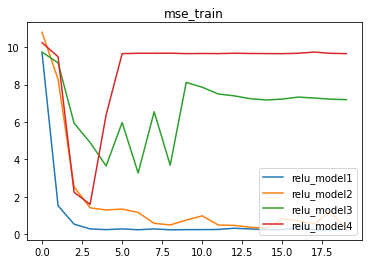

In [103]:
for i,name in enumerate(name_l):
  plt.plot(list(range(num_epochs)),train_l[i],label=name)
plt.legend(loc=4)
plt.title("mse_train");

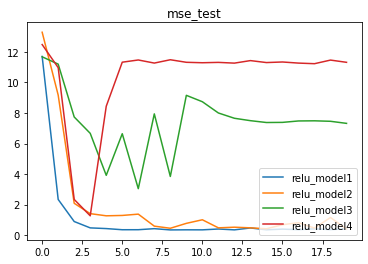

In [104]:
for i,name in enumerate(name_l):
  plt.plot(list(range(num_epochs)),test_l[i],label=name)
plt.legend(loc=4)
plt.title("mse_test");

> 此处ReLU激活函数叠加后出现的模型失效问题，也就是> 此处Sigmoid激活函数堆叠后出现的问题，本质上就是梯度消失所导致的问题。<font color="orange">Dead ReLU Problem。</font>

###**Sigmoid函数叠加**

In [105]:
class Sigmoid_class2(nn.Module):
  def __init__(self,in_features=2,n_hidden1=4,n_hidden2=4,out_features=1,bias=True):
    super(Sigmoid_class2,self).__init__()
    self.linear1 = nn.Linear(in_features,n_hidden1,bias=True)
    self.linear2 = nn.Linear(n_hidden1,n_hidden2,bias=True)
    self.linear3 = nn.Linear(n_hidden2,out_features,bias=True)

  def forward(self,x):
    z1 = self.linear1(x)
    p1 = torch.sigmoid(z1)
    z2 = self.linear2(p1)
    p2 = torch.sigmoid(z2)
    out = self.linear3(p2)
    return out
class Sigmoid_class3(nn.Module):
  def __init__(self,in_features=2,n_hidden1=4,n_hidden2=4,n_hidden3=4,out_features=1,bias=True):
    super(Sigmoid_class3,self).__init__()
    self.linear1 = nn.Linear(in_features,n_hidden1,bias=True)
    self.linear2 = nn.Linear(n_hidden1,n_hidden2,bias=True)
    self.linear3 = nn.Linear(n_hidden2,n_hidden3,bias=True)
    self.linear4 = nn.Linear(n_hidden3,out_features,bias=True)

  def forward(self,x):
    z1 = self.linear1(x)
    p1 = torch.sigmoid(z1)
    z2 = self.linear2(p1)
    p2 = torch.sigmoid(z2)
    z3 = self.linear3(p2)
    p3 = torch.sigmoid(z3)
    out = self.linear4(p3)
    return out

class Sigmoid_class4(nn.Module):
  def __init__(self,in_features=2,n_hidden1=4,n_hidden2=4,n_hidden3=4,n_hidden4=4,out_features=1,bias=True):
    super(Sigmoid_class4,self).__init__()
    self.linear1 = nn.Linear(in_features,n_hidden1,bias=True)
    self.linear2 = nn.Linear(n_hidden1,n_hidden2,bias=True)
    self.linear3 = nn.Linear(n_hidden2,n_hidden3,bias=True)
    self.linear4 = nn.Linear(n_hidden3,n_hidden4,bias=True)
    self.linear5 = nn.Linear(n_hidden4,out_features,bias=True)

  def forward(self,x):
    z1 = self.linear1(x)
    p1 = torch.sigmoid(z1)
    z2 = self.linear2(p1)
    p2 = torch.sigmoid(z2)
    z3 = self.linear3(p2)
    p3 = torch.sigmoid(z3)
    z4 = self.linear4(p3)
    p4 = torch.sigmoid(z4)
    out = self.linear5(p4)
    return out

In [111]:
# 创建随机数种子
torch.manual_seed(24)  

# 实例化模型
sigmoid_model1 = Sigmoid_class1()
sigmoid_model2 = Sigmoid_class2()
sigmoid_model3 = Sigmoid_class3()
sigmoid_model4 = Sigmoid_class4()

# 模型列表容器
model_l = [sigmoid_model1, sigmoid_model2, sigmoid_model3, sigmoid_model4]           
name_l = ['sigmoid_model1', 'sigmoid_model2', 'sigmoid_model3', 'sigmoid_model4']

# 核心参数
num_epochs = 50
lr = 0.03

train_l,test_l = model_comparison(
    model_l=model_l,
    name_l=name_l,
    train_data=train_loader,
    test_data=test_loader,
    num_epochs=num_epochs,
    criterion=nn.MSELoss(),
    optimizer=optim.SGD,
    lr=0.03,
    cla=False,
    eva=mse_cal
)

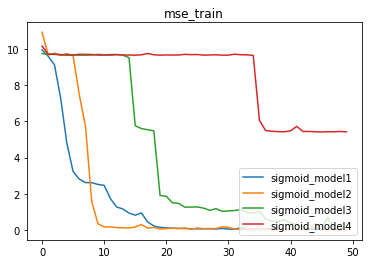

In [112]:
for i,name in enumerate(name_l):
  plt.plot(list(range(num_epochs)),train_l[i],label=name)
plt.legend(loc=4)
plt.title("mse_train");

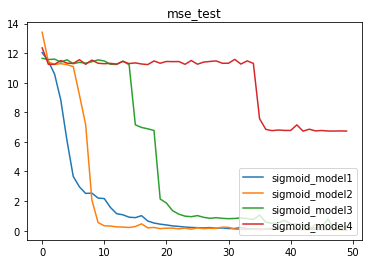

In [113]:
for i,name in enumerate(name_l):
  plt.plot(list(range(num_epochs)),test_l[i],label=name)
plt.legend(loc=4)
plt.title("mse_test");

> 此处Sigmoid激活函数堆叠后出现的问题，本质上就是<font color="orange">梯度消失</font>所导致的问题。

###**Tanh函数叠加**

In [114]:
class tanh_class2(nn.Module):                                   
  def __init__(self, in_features=2, n_hidden1=4, n_hidden2=4, out_features=1):       
      super(tanh_class2, self).__init__()
      self.linear1 = nn.Linear(in_features, n_hidden1)
      self.linear2 = nn.Linear(n_hidden1, n_hidden2)
      self.linear3 = nn.Linear(n_hidden2, out_features) 
      
  def forward(self, x):                                    
      z1 = self.linear1(x)
      p1 = torch.tanh(z1)
      z2 = self.linear2(p1)
      p2 = torch.tanh(z2)
      out = self.linear3(p2)
      return out

  
class tanh_class3(nn.Module):                                   
  def __init__(self, in_features=2, n_hidden1=4, n_hidden2=4, n_hidden3=4, out_features=1):       
      super(tanh_class3, self).__init__()
      self.linear1 = nn.Linear(in_features, n_hidden1)
      self.linear2 = nn.Linear(n_hidden1, n_hidden2)
      self.linear3 = nn.Linear(n_hidden2, n_hidden3)
      self.linear4 = nn.Linear(n_hidden3, out_features) 
      
  def forward(self, x):                                    
      z1 = self.linear1(x)
      p1 = torch.tanh(z1)
      z2 = self.linear2(p1)
      p2 = torch.tanh(z2)
      z3 = self.linear3(p2)
      p3 = torch.tanh(z3)
      out = self.linear4(p3)
      return out

    
class tanh_class4(nn.Module):                                   
  def __init__(self, in_features=2, n_hidden1=4, n_hidden2=4, n_hidden3=4, n_hidden4=4, out_features=1):       
      super(tanh_class4, self).__init__()
      self.linear1 = nn.Linear(in_features, n_hidden1)
      self.linear2 = nn.Linear(n_hidden1, n_hidden2)
      self.linear3 = nn.Linear(n_hidden2, n_hidden3)
      self.linear4 = nn.Linear(n_hidden3, n_hidden4)
      self.linear5 = nn.Linear(n_hidden4, out_features) 
      
  def forward(self, x):          
      z1 = self.linear1(x)
      p1 = torch.tanh(z1)
      z2 = self.linear2(p1)
      p2 = torch.tanh(z2)
      z3 = self.linear3(p2)
      p3 = torch.tanh(z3)
      z4 = self.linear4(p3)
      p4 = torch.tanh(z4)
      out = self.linear5(p4)
      return out
  
  # 创建随机数种子
torch.manual_seed(42)  

# 实例化模型
tanh_model1 = tanh_class1()
tanh_model2 = tanh_class2()
tanh_model3 = tanh_class3()
tanh_model4 = tanh_class4()

# 模型列表容器
model_l = [tanh_model1, tanh_model2, tanh_model3, tanh_model4]           
name_l = ['tanh_model1', 'tanh_model2', 'tanh_model3', 'tanh_model4']

# 核心参数
num_epochs = 50
lr = 0.03  
train_l, test_l = model_comparison(model_l = model_l, 
                  name_l = name_l, 
                  train_data = train_loader,
                  test_data = test_loader,
                  num_epochs = num_epochs, 
                  criterion = nn.MSELoss(), 
                  optimizer = optim.SGD, 
                  lr = lr, 
                  cla = False, 
                  eva = mse_cal)

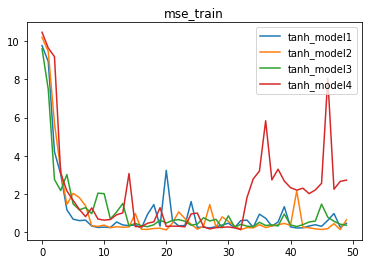

In [115]:
for i,name in enumerate(name_l):
  plt.plot(list(range(num_epochs)),train_l[i],label=name)
plt.legend(loc=1)
plt.title("mse_train");

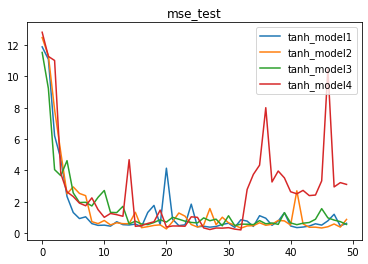

In [116]:
for i,name in enumerate(name_l):
  plt.plot(list(range(num_epochs)),test_l[i],label=name)
plt.legend(loc=1)
plt.title("mse_test");